# Ch.6 학습 관련 기술들

- 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼파라미터 설정 방법 등 학습
- 오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화 방법 학습
- 효과적인 학습을 위한 배치 정규화 학습
- 이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있습니다.

## 목차
6.1 매개변수 갱신  
__6.1.1 모험가 이야기   
__6.1.2 확률적 경사 하강법(SGD)   
__6.1.3 SGD의 단점 
__6.1.4 모멘텀  
__6.1.5 AdaGrad  
__6.1.6 Adam  
__6.1.7 어느 갱신 방법을 이용할 것인가?  
__6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교  
6.2 가중치의 초깃값  
__6.2.1 초깃값을 0으로 하면?   
__6.2.2 은닉층의 활성화 분포  
__6.2.3 ReLU를 사용할 때의 가중치 초깃값   
__6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교   
6.3 배치 정규화  
__6.3.1 배치 정규화 알고리즘  
__6.3.2 배치 정규화의 효과  
6.4 바른 학습을 위해  
__6.4.1 오버피팅   
__6.4.2 가중치 감소   
__6.4.3 드롭아웃   
6.5 적절한 하이퍼파라미터 값 찾기   
__6.5.1 검증 데이터   
__6.5.2 하이퍼파라미터 최적화   
__6.5.3 하이퍼파라미터 최적화 구현하기   

## 6.1 매개변수 갱신

- 신경망 학습은 손실함수의 값을 최대한 낮추는 매개변수를 찾는 것
- 이는 매개변수의 최적값을 찾는 문제로, 이러한 문제를 푸는 것은 최적화라고 한다
- 최적화 방법으로는 기존에 SGD(확률적 경사 하강법)을 사용했는데 이보다 더 나은 최적화 방법을 학습해본다.

### 1-1 확률적 경사하강법(SGD)

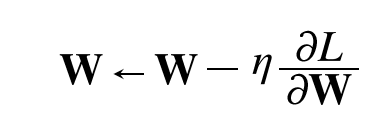


- $W$ : 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$ : W에 대한 손실함수의 기울기
- $\eta$ : 학습률


### 1-2 코드 구현

```python
class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]   # 각 params 에 lr*grads 만큼 갱신


```

### 1-3 SGD의 문제점

1. y값 변화에 따른 함수값 변화는 큰데, x값 변화에 따른 변화는 작은 경우 학습에 비효율이 발생한다
1. 아래의 최적화 갱신 경로를 보면 최솟값인 지점까지 지그재그로 비효율적으로 이동하는 문제가 있다
1. 이러한 단점 보완을 위해 모멘텀, AdaGrad, Adam이라는 방법을 소개하겠다.

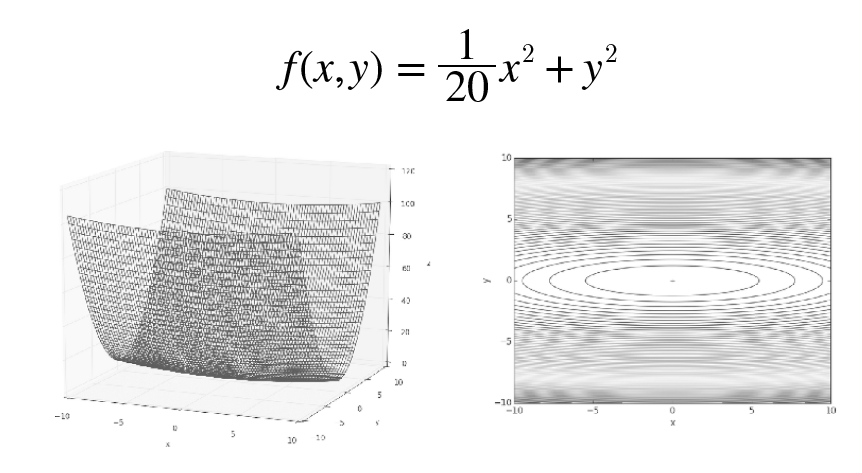
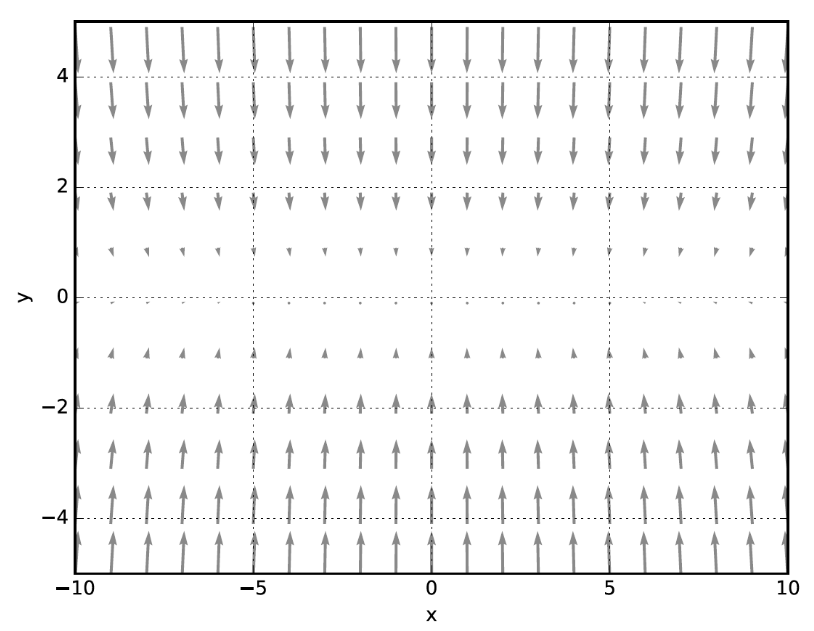
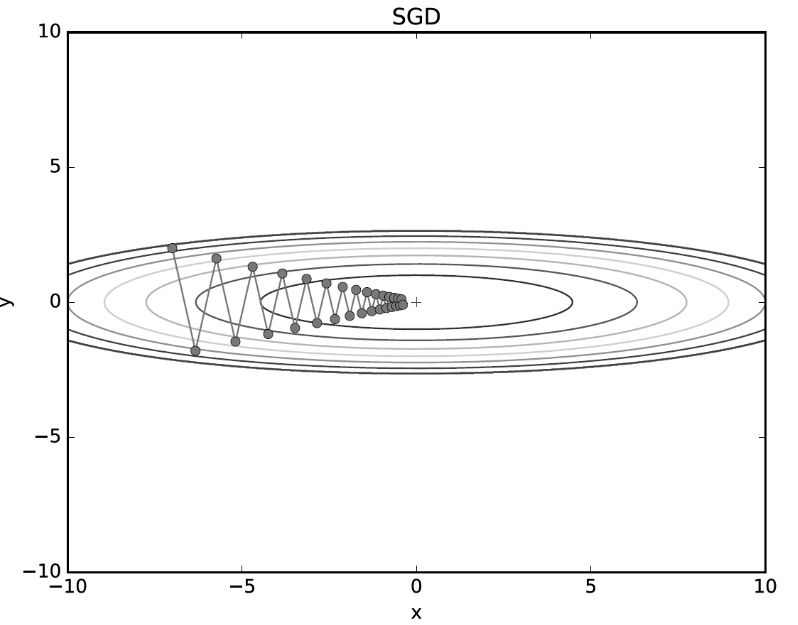

### 2-1 모멘텀

- 모멘텀은 운동량을 의미한다
- 같은 방향으로 연속하여 input이 들어오면 가속 / 반대방향으로 input이 들어오면 감속하는 개념이다.

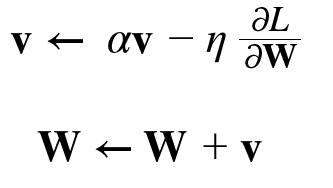

- $W$ : 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$ : W에 대한 손실함수의 기울기
- $\eta$ : 학습률
- $v$ : 물리에서 말하는 속도에 해당 
- $\alpha v$ : 물체가 아무런 힘을 받지 않을때 서서히 하강시키는 역할 (보통 $\alpha$는 0.9 값으로 설정).

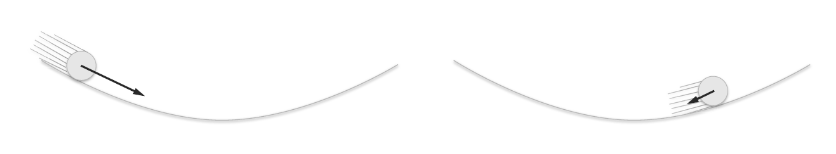


### 2-2 코드 구현

```python
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]
```

### 2-3 모멘텀 최적화 경로

- 모멘텀의 최적화 경로는 공이 그릇 바닥을 구르듯 움직인다
- SGD와 비교할때 지그재그 정도가 덜한 것을 알 수 있다
- x축 힘은 방향이 변하지 않아 일정방향으로 가속한다
- y축은 힘은 크나 위아래로 힘의 방향이 바뀌므로 y출 방향의 속도는 안정적이지 않다

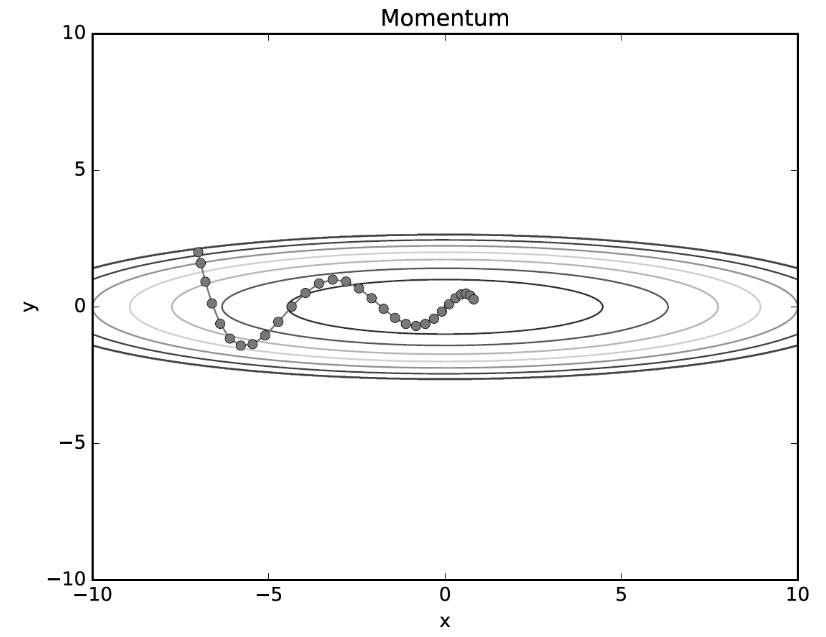

### 3-1 AdaGrad (Adaptive Subgradient)

- 학습을 진행하면서 학습률을 점차 줄여가는 방법(Learning rate decay)
- 각 매개변수에 적응적(Adaptive)으로 학습률을 조정하며 학습을 진행한다.

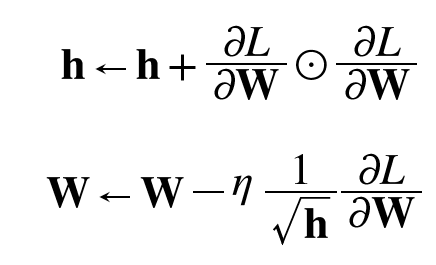

- $W$ : 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$ : W에 대한 손실함수의 기울기
- $\eta$ : 학습률
- h를 통해 기존 손실함수의 기울기의 제곱을 계속 더하여 갱신
- 매개변수를 갱신할때마다 손실함수의 기울기에 $\sqrt{h}$로 나누어 학습률을 조정한다
- 학습이 진행될 수록 h가 커지므로 손실함수의 갱신 폭이 작아지는 효과가 있다
- 손실함수가 갱신된 크기가 클 수록 다음 갱신때 반영되는 폭이 작아진다 

### 3-2 코드 구현
```python

class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
```

### 3-3 AdaGrad 최적화 경로

- y축 방향의 기울기가 커서 처음에는 크게 움직인다
- 그러나 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다
- y축 방향으로 갱신 강도가 빠르게 약해지고. 지그재그 움직임도 줄어든다
- 변화한 크기가 클수록 갱신의 강도가 빠르게 줄어드는 효과가 있다.

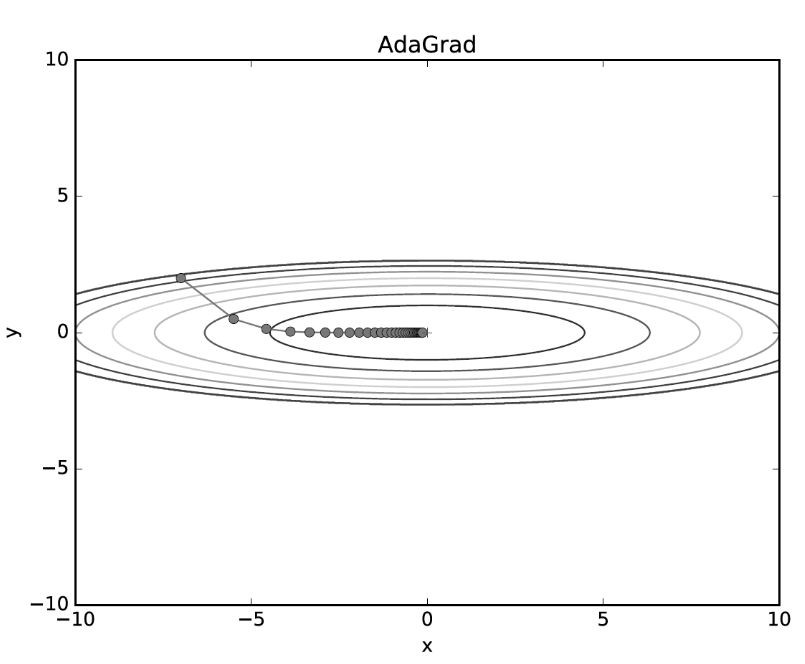

### 3-4 [참고] RMSProp 방법

- h <- h * decay_rate(=0.99)
- h <- h + ( 1 - decay_rate ) * $(\frac{\partial L}{\partial W})^2$
- W -< W - $\eta$$\frac{1}{h}$$\frac{\partial L}{\partial W}$  

1. 먼 과거의 기울기는 서서히 잊고,
1. 최신의 기울기 정보를 크게 반영하는 방법
1. decay_rate를 이용하여 과거의 기울기 반영규모를 기하급수적으로 감소시킨다

```python
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

```

### 4-1 Adam

- Adam = Momantum + RMSProp(~AdaGrad)
- 즉, 모멘텀 기법과 RMSProp기법을 섞은 기법이다


### 4-2 코드 구현
```python
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)
           
```

### 4-3 Adam 최적화 경로

- Adam의 갱신과정도 그릇의 바닥을 구르듯 움직인다(모멘텀과 비슷한 패턴)
- 그러나 모멘텀보다는 공의 좌우 흔들림이 적다(학습의 갱신정도를 적응적으로 조정한 결과)

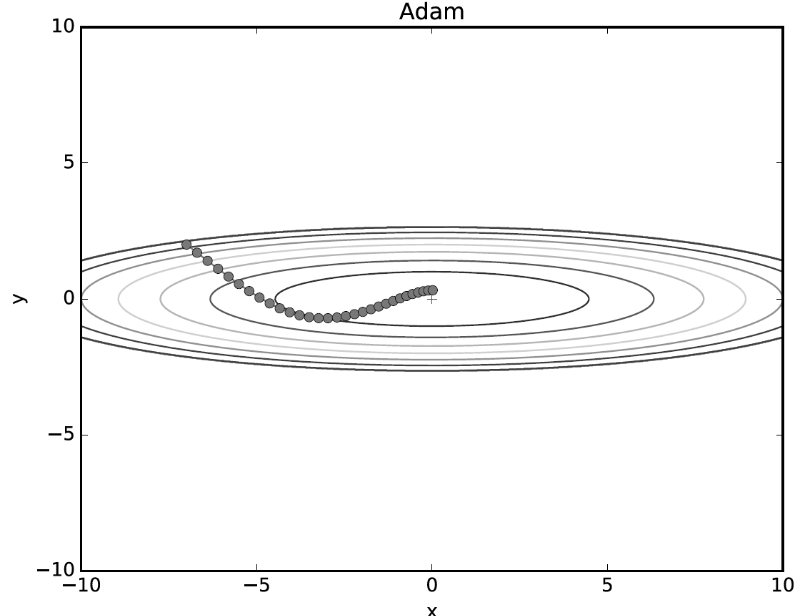


### 5 MNIST 데이터셋으로 본 갱신 방법 비교

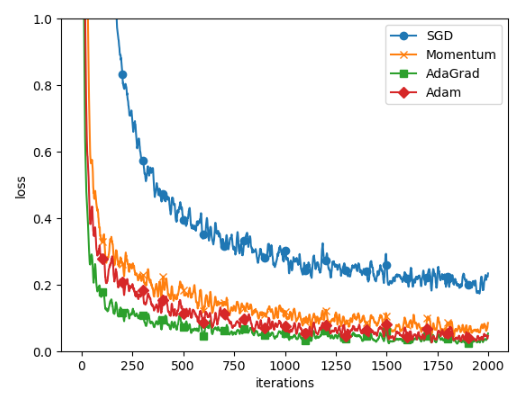

- SGD보다 다른 기법들이 더 빠르게 학습하고, 정확도도 높은 경향을 보인다

## 6.2 가중치의 초깃값

- 가중치의 초깃값을 무엇으로 설정하느냐에 따라 신경망 학습의 성패를 가르는 일이 자주 있음
- 활성화 함수를 시그모이드 함수로 하는 5층의 신경망에서 각 층의 활설화 값 분포로 그 중요성을 알아보자
- 층은 5개, 각 층의 뉴런은 100개, 입력 데이터는 1000개의 서로 다른 분포의 데이터로하여 분포를 알아본다.

```python
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

```

###  (시작하기 전에) 초깃값을 0으로 한경우

- 초깃값을 모두 0으로 하는 경우 오차역전파법에서 모든 가중치 값이 똑같이 갱신되므로 가중치를 여러개 갖는 의미가 사라진다
- 이러한 가중치가 고르게 되는 상황을 막으려면 초깃값을 무작위로 설정해야한다
- 그러면, 가중치를 표준편차별로 무작위로 분포시켜 신경망의 각 층별로 데이터의 분포를 알아보자


### 표준편차 = 1 일때 활성화값 분포

- 활성화값들이 0 또는 1에 치우쳐 분포되어있다
- 시그모이드 함수는 출력이 0 또는 1에 가까워지면 그 미분은 0에 다가가므로 역전파의 기울기값이 작아진다
- 그 결과 기울기 소실이라는 문제가 발생하게 된다

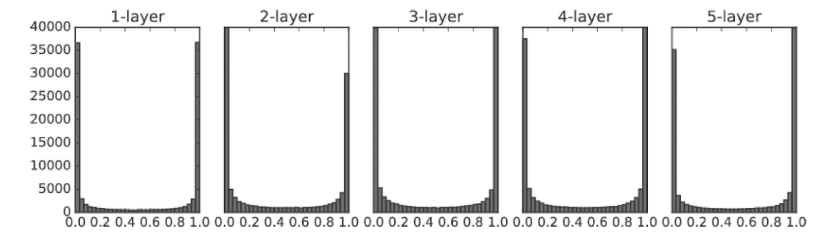


### 표준편차 = 0.01 일때 활성화값 분포

- 활성화값들이 가운데 0.5 부근에 집중되어 있다 (그리고 점점더 가운데로 모이는 경향이 있다)
- 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제가 있다
- 즉, 뉴런이 같은 값을 출력하므로 뉴런을 여러개 둔 의미가 없어진다는 의미이다

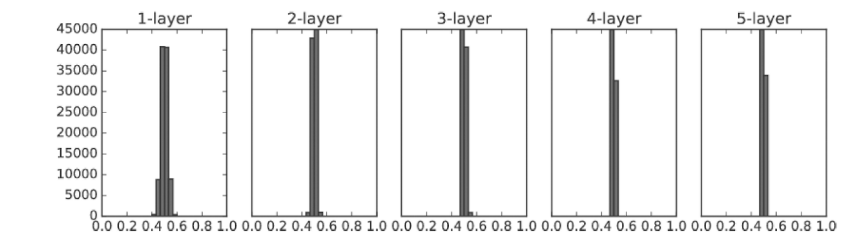


### Xavier 초깃값

- 사비에르 글로로트와 요슈아 벤지오의 논문에서 제기된 초깃값 설정 방법
- 앞 계층의 노드가 n개일때, 표준편차를 $\frac{1}{\sqrt{n}}$의 분포로 사용하는 방식
- 활성화값 분포가 적당하게 퍼져 있는 것을 볼 수 있다

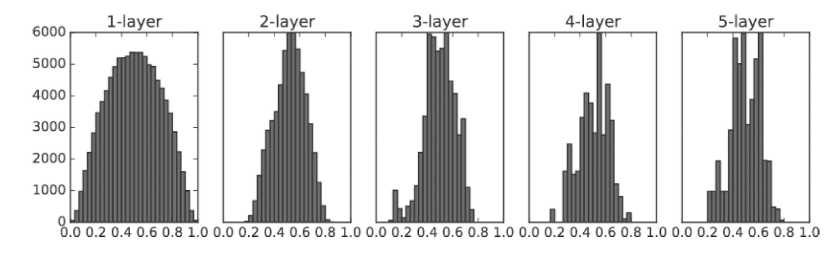


### 활성화 함수를 ReLU로 사용하는 경우

- Xavier 초깃값은 활성화함수가 선형임을 전제로 하여 이끈 결과이다 (시그모이드, tanh함수의 경우 중앙부근이 선형)
- ReLU는 중앙부근이 선형이 아니므로 __He 초깃값__ 을 사용한다
- He 초깃값은 앞 계층 노드가 n개일때, 표준편차를 $\sqrt{\frac{2}{n}}$로 설정하는 방법  

- ReLU 활성화 함수의 경우 표준편차를 0.01로 하거나 Xavier로 하는 경우 분포가 균일하지 않다
- 그러나, He 초깃값을 사용하면 고르게 분포되는 것을 볼 수 이싸

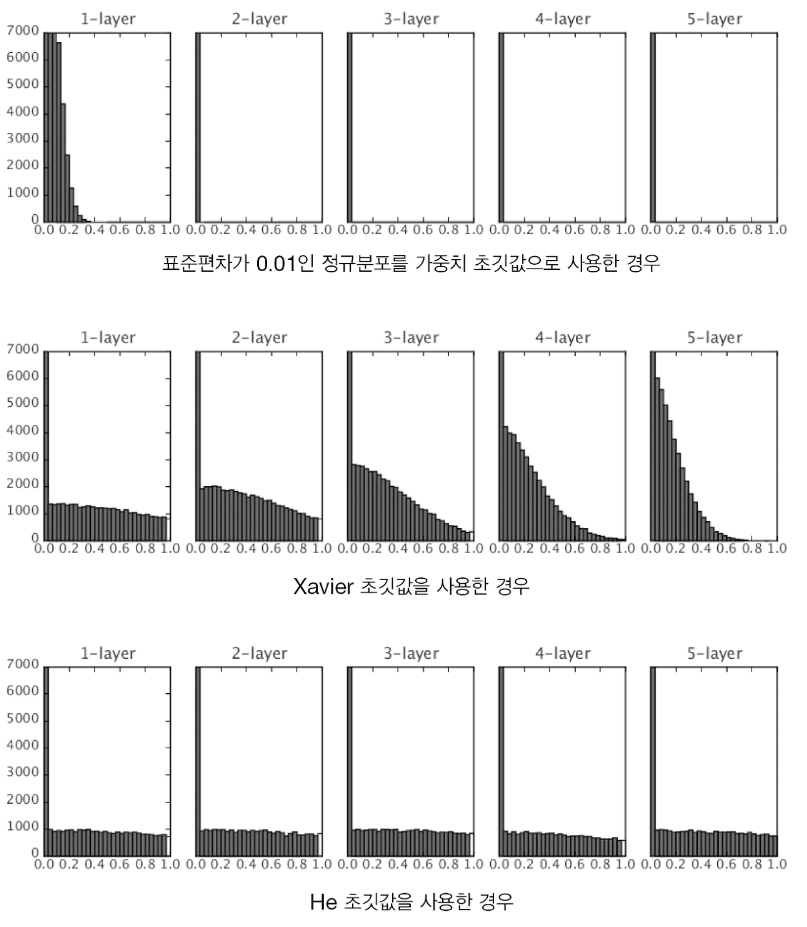

### MNIST 데이터셋으로 본 가중치 초깃값 비교

- 활성화 함수로 ReLU를 사용한 결과
- 표준편차가 0.01인 경우 학습이 거의 이뤄지지 않음 (활성화값 분포가 0 근처에 밀집하여 분포하기 때문)
- ReLU 맞춤의 초깃값 분포인 He초깃값이 Xavier초깃값에 비해 학습이 더 잘 이루어진다

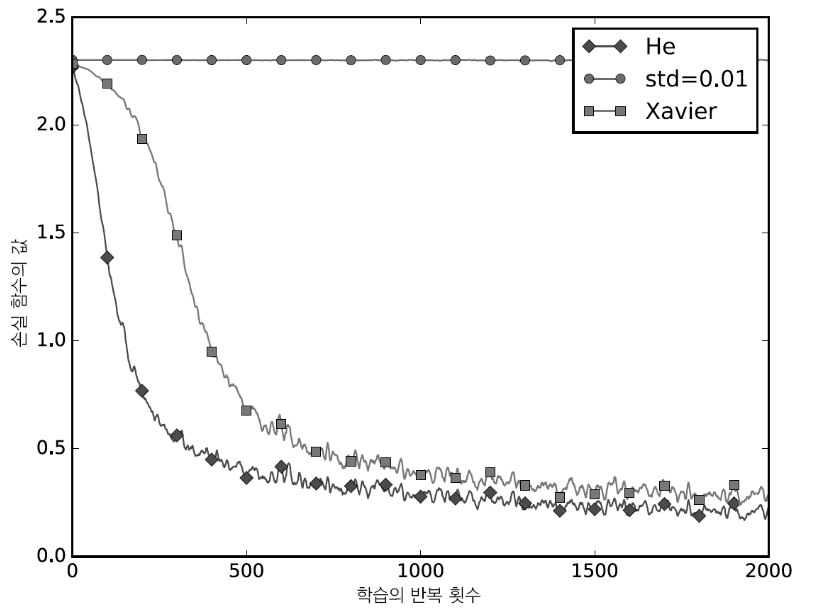

## 6.3 배치 정규화

- 가중치 초깃값을 적절히 설정하면 활성화값 분포가 적당히 퍼져 학습이 원활이 수행된다
- 효과적 학습을 위해 각 층이 활성화를 적당히 퍼뜨리도록 강제해보는 방식을 생각해볼 수도 있다
- __배치 정규화__ 가 그러한 아이디어에서 출발한 방식이다

### 6.3.1 배치 정규화 알고리즘

배치정규화가 주목받는 이유
- 학습을 빨리 진행할 수 있다(학습속도개선)
- 초깃값에 크게 의존하지 않는다
- 오버피팅을 억제한다  

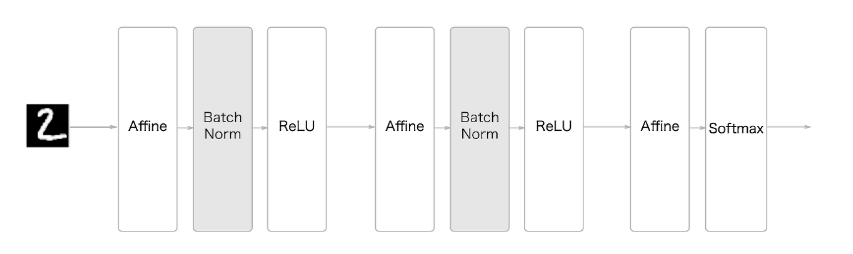
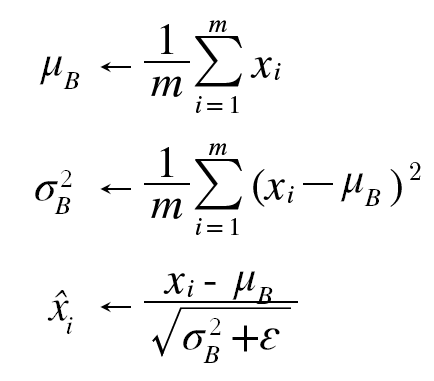

- 배치 정규화는 학습시 미니배치를 단위로 분포를 정규화한다 ( 평균 = 0, 분산 = 1 로 정규화 )

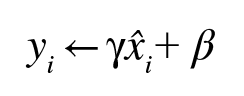

- 그리고 $\gamma$로 확대를 $\beta$로 이동을 갱신하여 적합한 값으로 조정해나간다
- 초깃값은 $\gamma$=1, $\beta$=0 부터 시작한다  

- 배치 정규화 알고리즘은 아래와 같다.

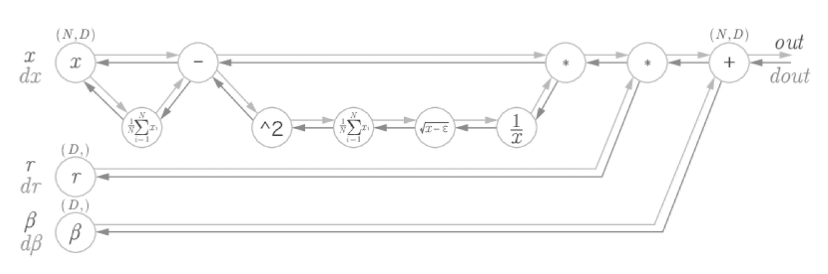

### 6.3.2 배치 정규화의 효과

- 배치정규화를 사용하는경우 그렇지 않은 경우보다 학습속도가 빠르다 (활성화값을 고르게 분포하게 하므로)
- 실선 : 배치정규화를 사용한 경우 / 점선 : 배치정규화하지 않은 경우


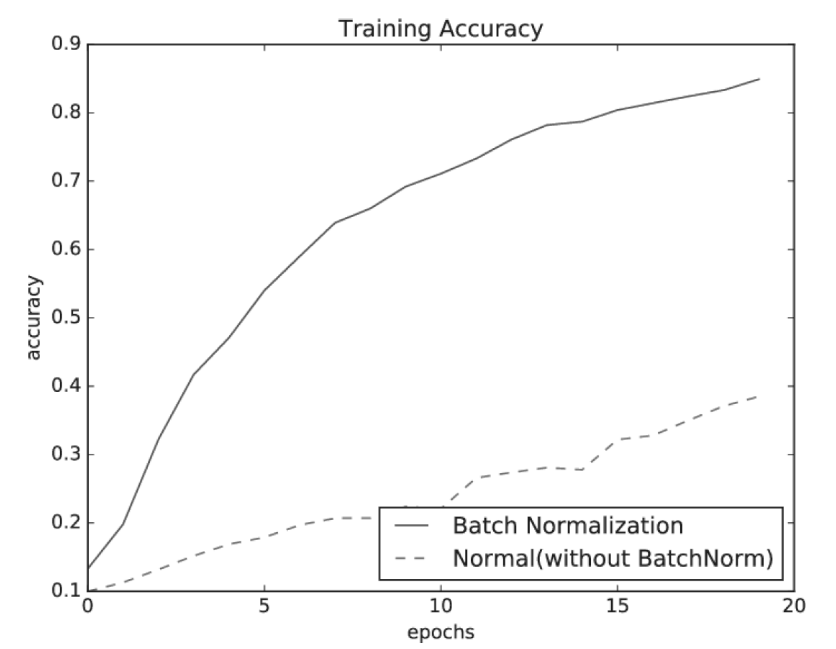
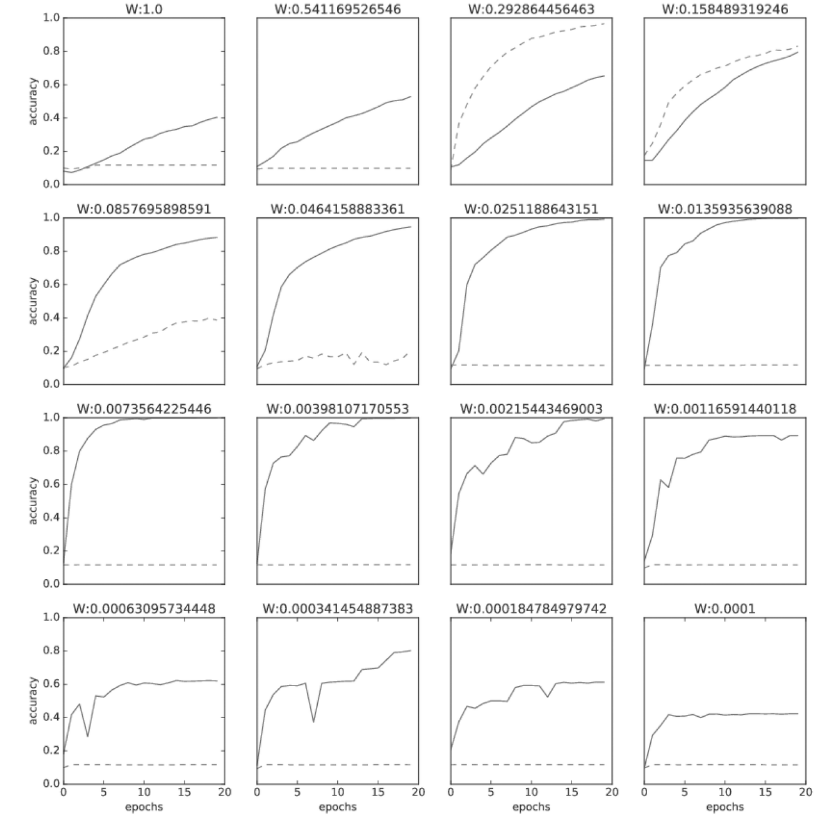

## 6.4 바른 학습을 위해

- 기계학습에서는 신경망이 훈련데이터에만 지나치게 적응되어 다른 데이터에 제대로 적응못하는 __오버피팅__ 문제가 있다
- 이러한 오버피팅 억제를 위한 방법으로는 가중치 감소와 드롭아웃 기법이 있다

### 6.4.1 오버피팅

오버피팅은 다음의 두 경우에 발생한다
- 매개변수가 많고 표현력이 높은 모델
- 훈련데이터가 적은 경우

### 오버피팅 실험

- MNIST의 6만개의 데이터셋에서 300개만 훈련데이터로 사용하고
- 7층의 네트워크로 네트워크 복잡성 증가
- 각 층뉴런은 100개, 활성화함수를 ReLU로 사용하여 결과 확인


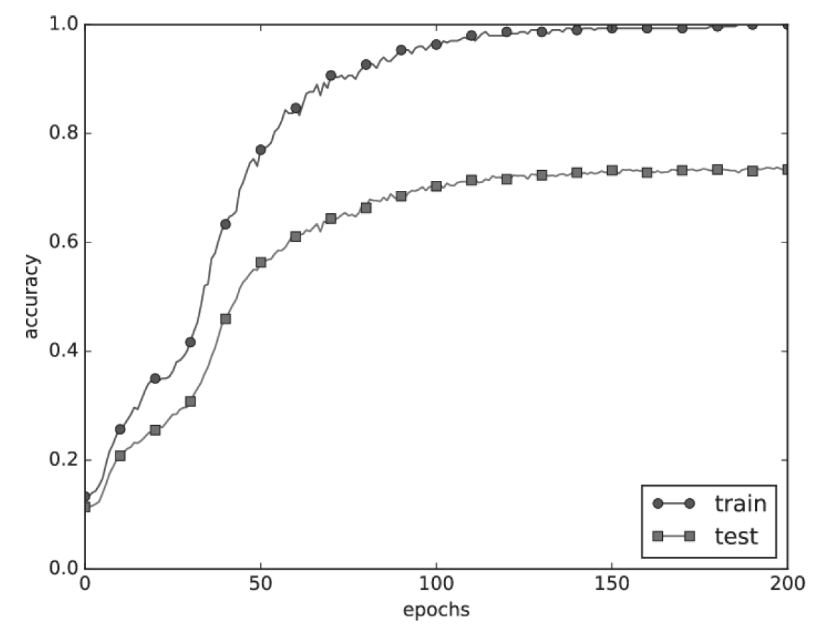

- 훈련데이터의 경우 100 epochs 즈음에 정확도가 거의 100%에 달한다
- 그러나 시험데이터와 정확도 차이가 크게 벌어진다
- 이는 훈련 데이터에만 지나치게 적응한 결과이다
- 그 결과, 훈련때 사용하지 않은 범용 데이터(시험 데이터)에는 제대로 대응하지 못하는 문제가 나타난다

### 구현 코드

```python
# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

```

### 6.4.2 가중치 감소

- 오버피팅 억제를 위해 __가중치 감소__ 방식을 사용해볼 수 있다
- 이는 학습과정에서 큰 가중치에 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다
- 방식으로는 크게 L2 릿지와 L1 라쏘가 있다 (일반적으로 L2의 방식이 자주 쓰인다)
- L2는 가중치의 제곱을 손실함수에 더해주는 방식 / L1은 가중치의 절대값을 손실함수에 더해주는 방식

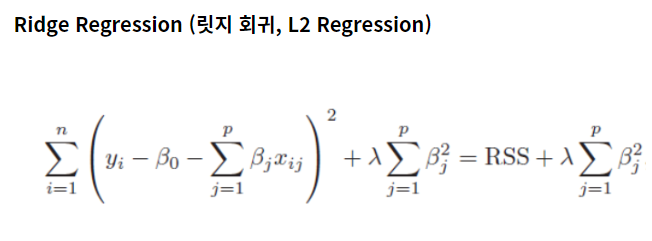
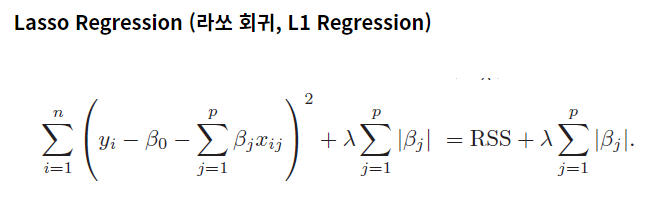

### 오버피팅 비교

- 가중치 감소를 하지 않은 경우 보다 정확도 차이가 크게 줄었음을 볼 수 있다.
- 가중치 감소를 하지 않은 경우와 달리 훈련데이터의 정확도가 100%에 도달하지는 못했다

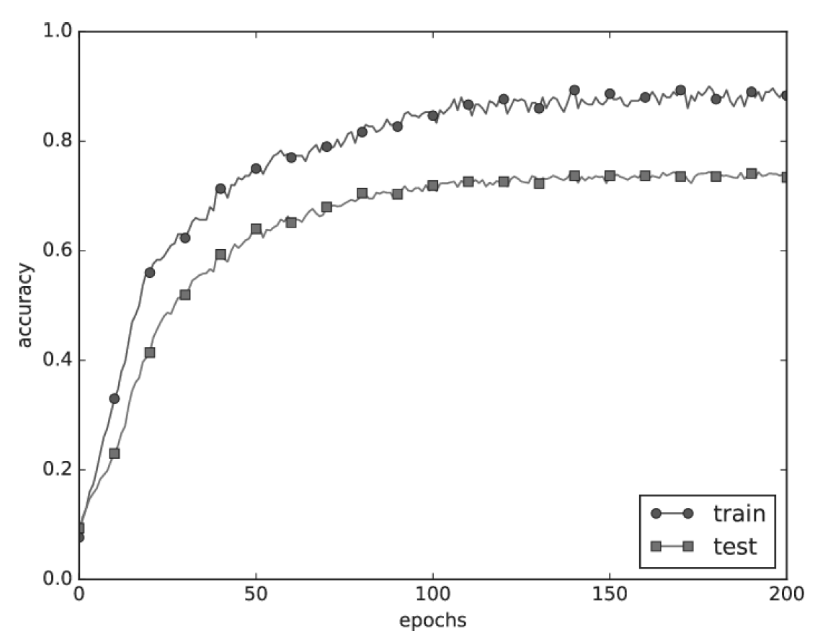


### 6.4.3 드롭아웃

- 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워질 수 있다
- 이럴때 __드롭아웃__ 기법을 사용할 수 있다
- 드롭아웃은 뉴런을 일정 비율로 무작위로 삭제하면서 학습하는 방법이다

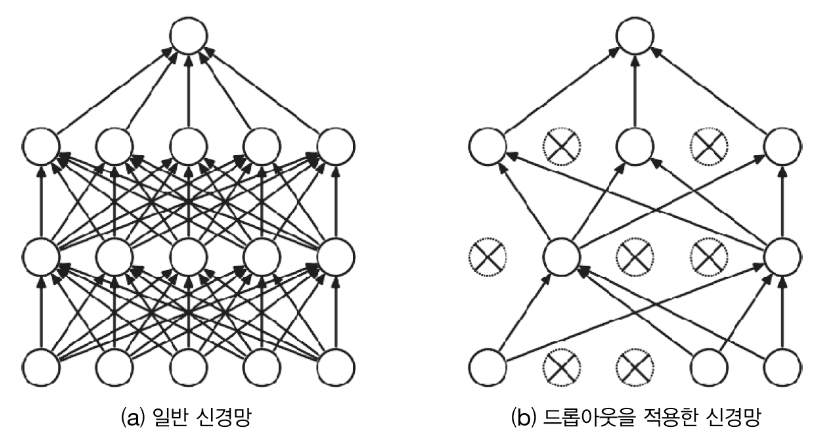

### 오버피팅 비교

- 왼쪽은 드롭아웃 없이, 오른쪽은 드롭아웃을 적용한 결과 (dropout_ratio =  0.15)
- 드롭아웃을 적용한 결과 훈련-시험데이터에 대한 정확도 차이가 줄어들었다
- 훈련데이터의 정확도가 100%에 도달하지 않았다

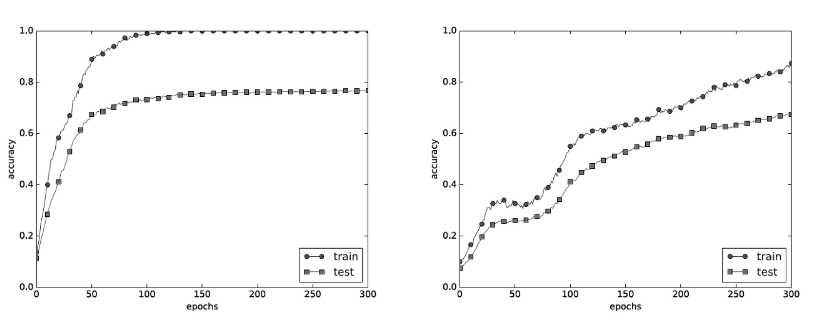


### 코드구현

1. 드롭아웃 비율에 따라 무작위로 마스크를 생성한 뒤
1. 마스크로 순전파와 역전파의 신호를 통과시키거나 차단한다.

```python
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        # True인 경우
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        # False인 경우
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

```

## 6.5 적절한 하이퍼 파라미터 값 찾기

- 하이퍼 파라미터는 신경망 학습에서 임의로 설정할 수 있는 값이다
- 각 층의 뉴런 수, 배치크기, 학습률, 가중치 감소 등이 있다
- 이러한 하이퍼 파라미터 값을 적절히 설정해야 모델의 성능을 좋게 할 수 있다
- 이번절은 하이퍼 파라미터 값을 최대한 효율적으로 탐색하는 방법을 설명한다.

### 6.5.1 검증데이터

- 오버피팅 여부와 범용성능 평가를 위해 데이터셋을 훈련-시험으로 분리하여 사용한다.
- 하이퍼 파라미터를 다양한 값으로 설정하고 검증할 때 시험데이터를 사용해서는 안된다
- 따라서 하이퍼 파라미터 조정용 데이터로 훈련데이터 중에서 검증데이터를 분리하여 훈련, 평가한다

정리하면
- 훈련데이터 : 매개변수 학습
- 검증데이터 : 하이퍼파라미터 성능 평가  // (보통 훈련데이터 중 20%정도를 분리한다)
- 시험데이터 : 신경망의 범용 성능 평가
```python
# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

```

### 6.5.2 하이퍼파라미터 최적화

하이퍼파라미터 최적화를 할때 핵심은, '최적값'이 존재하는 범위를조금씩 줄여가는 것이다

- __0단계__  
하이퍼파라미터 범위를 설정
- __1단계__  
설정범위내에서 하이퍼파라미터 값을 무작위로 추출
- __2단계__  
1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증데이터로 정확도 평가(단, 에폭은 작게 설정)
- __3단계__  
1단계와 2단계를 특정 횟수(100회 등) 반복하여, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다  

### 6.5.3 하이퍼파라미터 최적화 구현

- 가중치 감소 계수를 $10^{-8}~10^{-4}$ 범위에서, 학습률을 $10^{-6}~10^{-2}$ 범위에서 무작위로 추출
```python
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================
```

### 학습 결과

- 학습 결과를 검증 데이터(실선)의 학습 추이를 정확도가 높은 순서로 나열
- 결과를 보면, 학습률은 0.001~0.01, 가중치 감소 계수는 $10^{-7}~10^{-6}$ 범위에서 학습이 잘되는 것을 알 수 있다  
(자세한 코드 및 결과는 아래 코드 및 결과 참고)

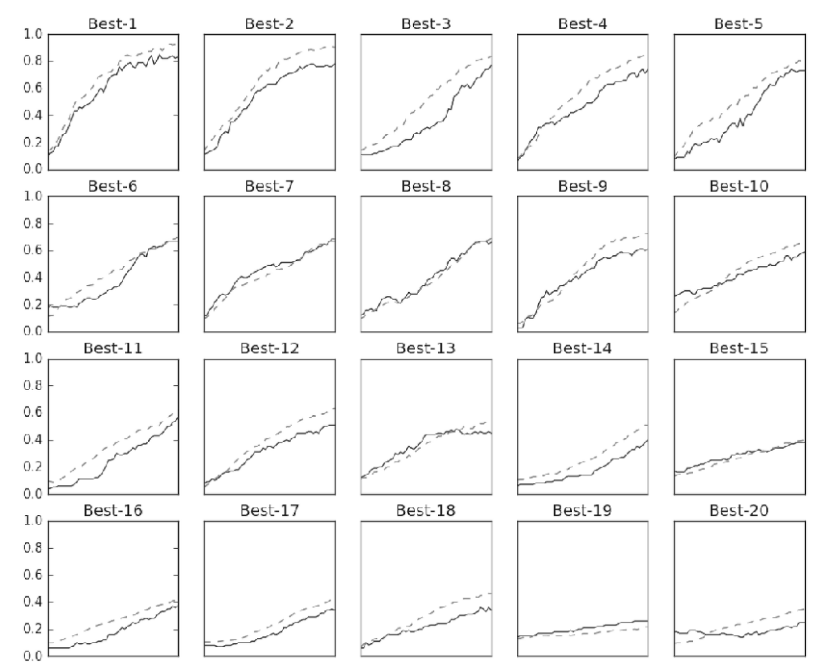

=========== Hyper-Parameter Optimization Result ===========  
Best-1(val acc:0.81) | lr:0.008938475724820165, weight decay:1.1470437879789117e-07  
Best-2(val acc:0.8) | lr:0.008634520225547228, weight decay:1.9821900030483176e-08  
Best-3(val acc:0.77) | lr:0.007923629835137497, weight decay:2.2041137993896224e-08  
Best-4(val acc:0.76) | lr:0.00960930920752717, weight decay:8.500965648713188e-07  
Best-5(val acc:0.75) | lr:0.009839116103968214, weight decay:4.1231880738947124e-07  

val acc:0.15 | lr:4.074856814904219e-05, weight decay:5.42917727147215e-05
val acc:0.11 | lr:8.183347452437428e-05, weight decay:2.6044451469403134e-06
val acc:0.54 | lr:0.003834625956426936, weight decay:1.0722058185435726e-05
val acc:0.07 | lr:1.133390812205543e-06, weight decay:3.2591122634966825e-05
val acc:0.77 | lr:0.007923629835137497, weight decay:2.2041137993896224e-08
val acc:0.39 | lr:0.002647110899644966, weight decay:6.861744543671142e-06
val acc:0.07 | lr:6.035033085152448e-05, weight decay:4.980113429880645e-06
val acc:0.02 | lr:2.0308873608063176e-06, weight decay:5.437432497483213e-05
val acc:0.24 | lr:0.0001648848019107041, weight decay:2.2443307939310768e-05
val acc:0.75 | lr:0.009839116103968214, weight decay:4.1231880738947124e-07
val acc:0.08 | lr:1.1278617965420737e-05, weight decay:3.084943327631782e-07
val acc:0.66 | lr:0.006685038763251354, weight decay:3.2319602034328297e-07
val acc:0.08 | lr:7.937300411339059e-05, weight decay:4.6562920625508995e-07
val acc:

Best-16(val acc:0.52) | lr:0.0024711814401954034, weight decay:6.1735712044356144e-06
Best-17(val acc:0.51) | lr:0.0028105101106643215, weight decay:1.0753408323128785e-06
Best-18(val acc:0.39) | lr:0.002647110899644966, weight decay:6.861744543671142e-06
Best-19(val acc:0.35) | lr:0.002650575895833688, weight decay:1.7611051041696536e-06
Best-20(val acc:0.35) | lr:0.001130110966798736, weight decay:1.7448185656434192e-05


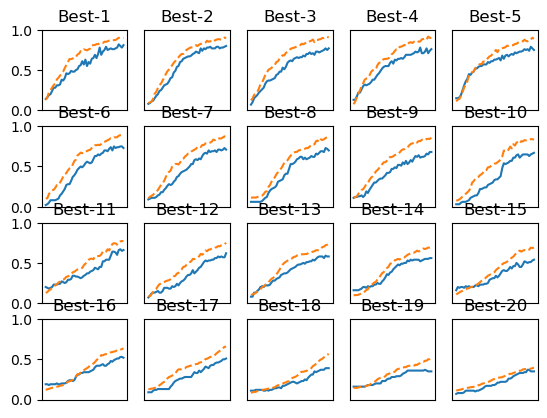

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

## 6.6 정리

- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
- 가중치의 초깃값으로는 ‘Xavier 초깃값’과 ‘He 초깃값’이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.